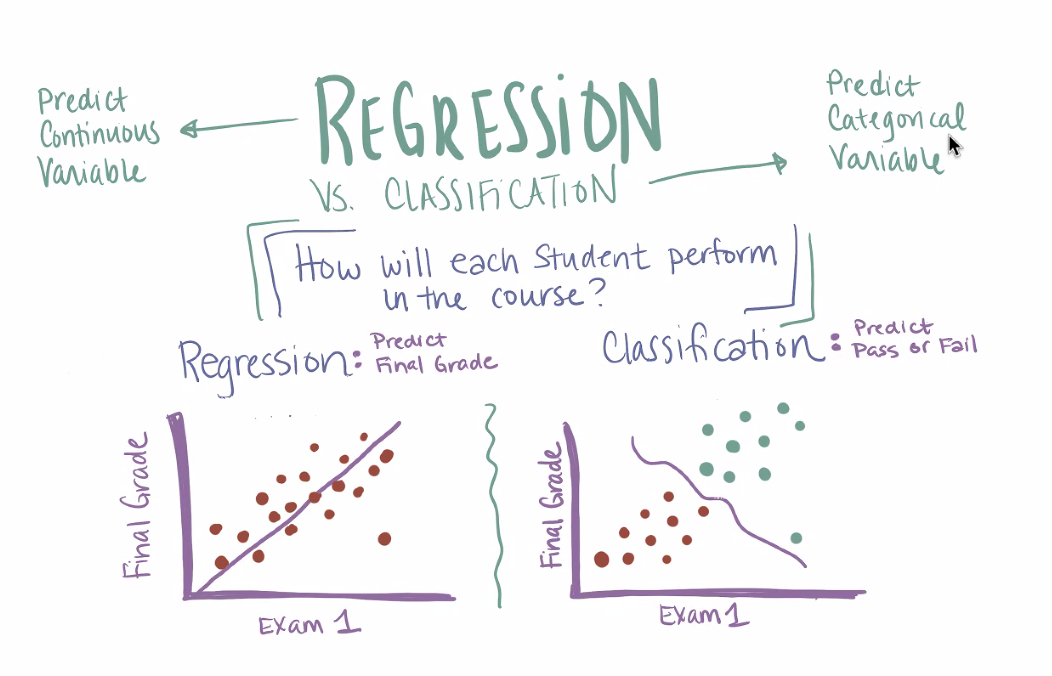

- could be a straight line could be a curvy line
- classification 
    - trying to minimize misclassification but 
- regression 
    - the equilivlent of error is how far away each data point is from best fit.
        - how well does the line fit with the points

# Intro to Regression

## What is Linear Regression
- Supervised learning, so we'll be using labeled data
- Used to predict continuous target variable outcomes
- Our features can be categorical and/or continuous
- Our categorical features need to be encoded
    - get dummies will work fine here
- Our continuous values should be scaled
    - in this modeule we will introduce scaling
        - helps models be more accurate
        - everything in this can be applied to classification that are distance based

## So What?

Examples of regressions used to predict a continuous target:
- Predict sales given the number of advertisements in a market
- Predict sales using internet traffic numbers and the number of print advertisements
- Predict a final grade using the midterm
- Predict lemonade sales using temperature and rainfall features

What his interesting is that it opens out toolbot so we are not just dealing with classification problems

## Types of Linear Regression

- Simple Linear Regression (Use x to predict y)
    - very simple
    - using 1 reature (x) to predict the target (y)
        - predict weight using height
            - will not be perfect but still a linear regression
- Multiple Linear Regression (Use multiple features to predict y)
    - uses multiple different features (cat. of cont.) that predicts our target
- Multivariate Linear Regression (Use features to predict y and z)
    - use features to predict multiple target variables.
    
- Difference between multiple and multivariate look at the variate and think of "variables".
    - Variate = Variables

**Mainly focusing on the first 2.**

## Simple Linear Regression Equation

- $y = mx + b$, also expressed as $y = b_0 + b_1x$
    - (+ b) is whatever our y would be if we didnt have a variable
    - whater coefficient we are multiplying x by we can have a deep line, steep line, shallow line etc
- Example: Use the total_bill to predict the tip amount
- Example: Use the midterm to predict the final grade
- Example: Predict sales given the number of customers in the store


## Multiple Linear Regression Equation

- $y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n$
    - This is what we will do mor of
        - might have different x's. 
        - can have many features
- Example: Predict lemonade sales using temperature and rainfall
-  Example: Predict sales using internet traffic and visitor demographic information
    - still looking for drivers just not for the categorical
- Example: Use the total_bill, table_size, and whether if it's lunch or dinner to predict the tip amount
    - they may have a relationship
    - they may be better drivers
        - Maybe table_size means bigger tables may tip more


## Assumptions of Linear Regression

- Linear relationship between feature(s) + target
- Little or no multi-colinearity (that means correlation of features w/ each other)
    - we have featurews very tightly coorelated to one another
    - this comes up from tiem to time
- Normality Assumption that residuals are (approximately) normally distributed. We'll see this in Eval.
    - this is not assuming data point are distributed to the residuals are notmaly approzimatly distributed
    the risidual is aslso known as the error
        - how far away our data point is from the prediction line
- Homoscedasticity, where residuals are equally distributed across the regression line. We'll see this in Eval.
    - residuals are evenly distributed across regression line
        - maybe 5 on top and 5 on bottom
        - if there is 10 on top and none on bottom our predicition is too low
- No auto-correlation. Auto-correlation is where a value correlates with a past value of itself. This is the land of time-series analysis, not regression.
    - when a value or a feature is coorelated with itself
        - happens ALL the time
            - especially in time series analysis
    - Can be a little confusing 
        - if we are predicting this motnhs sales using last months sales then we are looking at **TIME SERIES**
        - if we are predicting this months sales based on number of customers and their demographic demo then it is **REGRESSION**.



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

<function matplotlib.pyplot.show(close=None, block=None)>

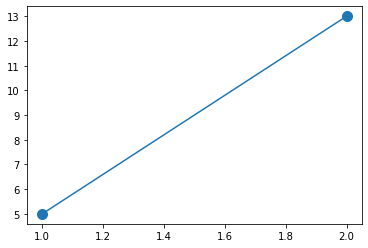

In [3]:
x = [1, 2] # we have only 2 differnt points
y = [5, 13]
plt.plot(x, y, marker=".", markersize=20)
plt.show
# The slope is the mx part of y = mx + b
# the b part of y = mx+b is the y valie when x = 0
# so once you have y = mx+ b you can determine th ey for any value

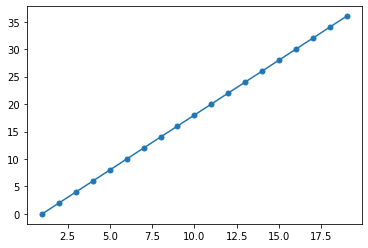

In [4]:
# If all of the points exist on the exact same line, then we don't need a regression, all we need is the equation!
x = range(1, 20)
y = [n*2 - 2 for n in x]
plt.plot(x, y, marker=".", markersize=10)
plt.show()
# if all our irl data points were in a straight line and there was no wiggle room then this would be a perfect model

# What's the Big Idea of Regression?
- Approximate the equation underlying the relationship between the feature(s) and target
- Obtain the "line of best fit". The line that best approximates the relationship w/ the lowest amount of error
    - Biggest goal
    - The line that matches those data point as close as possible so we minimize our error as much as we can
- Use that approximation to make predictions on new data points!
    - cause they are all linear fucntions
    - try and make predictions on brand new data points
    - in Machine Learning we dont really know the function underlining the relationship between input and outputs

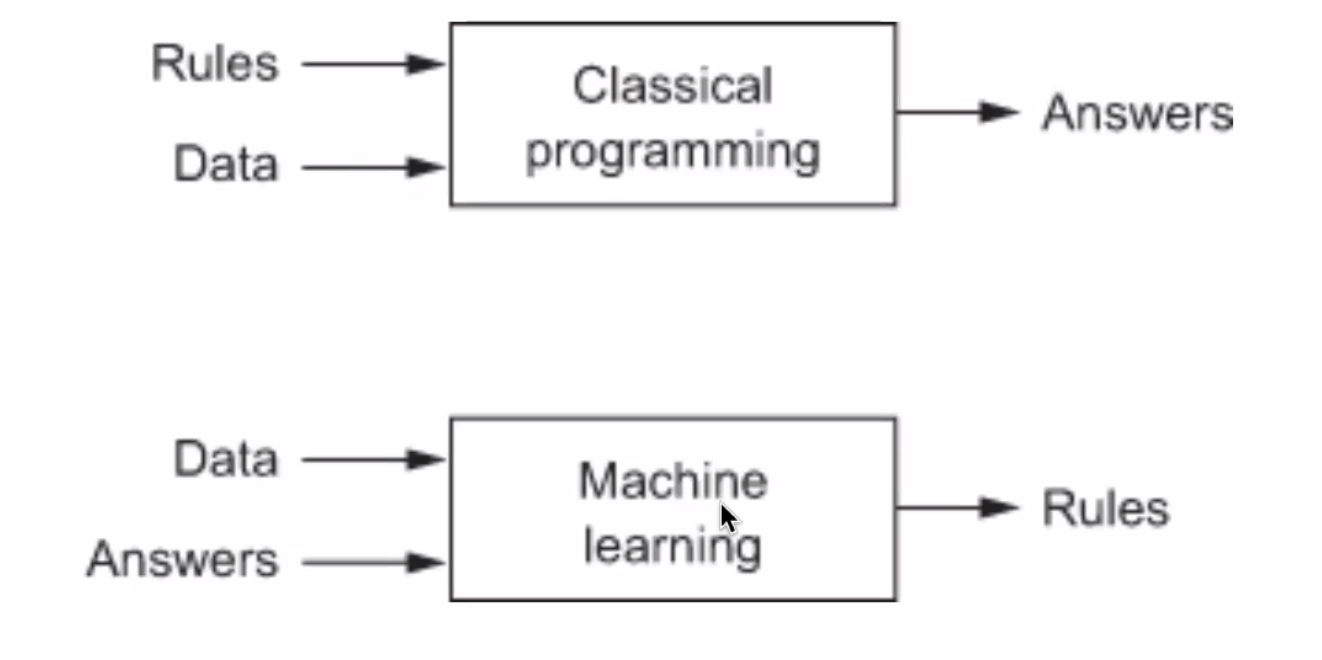

<AxesSubplot:xlabel='x', ylabel='y'>

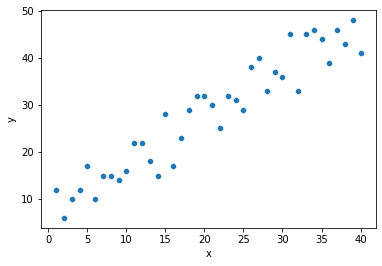

In [5]:
df = pd.DataFrame()
df["x"] = np.arange(1, 41)
df["randomness"] = np.random.randint(1, 15, 40)
df["y"] = df.x + df.randomness

sns.scatterplot(x="x", y="y", data=df)
# looks like a good candidate because data points arent all over the place they look like they are pretty darn close and in a range together

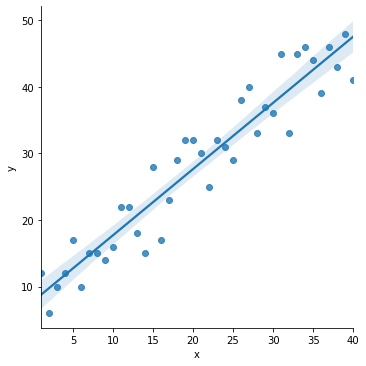

In [6]:
# LM = linear model
sns.lmplot(x="x", y="y", data=df)
# lmplot stands for linear model plot
# this will give us a line of best fit and a confidence interval(the light blue commingof the line)
# if the model put a line at the lippity top it would be a horrible model cause it woudl have a crazy amount of error

### More info on confidence interval
- default is 95%
- `ci` is the size of the confidence interval
   - between 0 and 100
- so the line of best regression and confidence interval on the above slmplot is saying that 95% should be in the band around the line
    - not talking about the dots we have but rather the dots we dont have would have a 95% change of being in that band
        - if all the continous posisble values of x there  is a 95% chance they will be in this range
- if the confidence interval is tight we are expecting tight grouping
    - the one above is tight because there isnt a large amount af variance within that specified data set.


In [7]:
# We can use .corr() super quickly to see the correlation between x and y 
df[["x", "y"]].corr()

# to get linear correlation
    # so .949 which is pretty good
    # coor of 1 everyhting is moving in lockstep together

,x,y
x,1.000000,0.950197
y,0.950197,1.000000


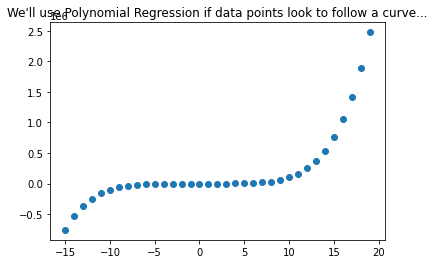

In [8]:
x = range(-15, 20)
y = [n**5 - 5 for n in x]
plt.title("We'll use Polynomial Regression if data points look to follow a curve...")
plt.scatter(x, y)
plt.show()

# curvy line not straight
    # suggesting our datapoints are folling a pattern that is polynomial in nature
# the idea is to fin d the line of best fit accros these datapoints

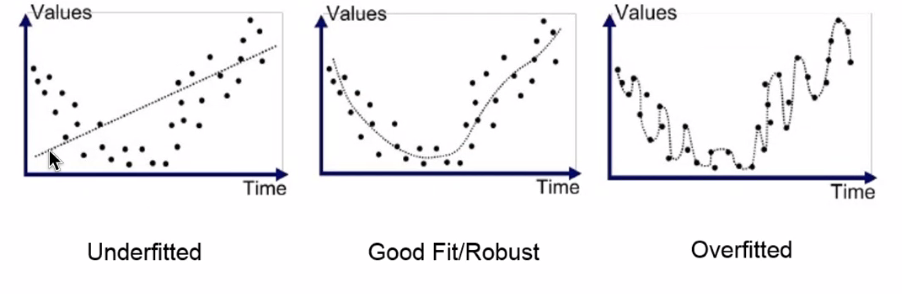

In [9]:
from pydataset import data
df = data('tips')
df.head()
# this is far more realistic

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df[['total_bill', 'tip']].corr()
# gerally higher bill the higher the tip but is not super lockstep

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


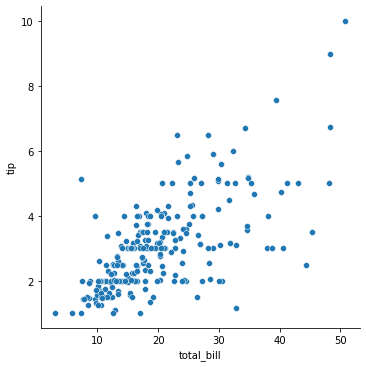

In [11]:
sns.relplot(x="total_bill", y="tip", data=df)
# gerally higher bill the higher the tip but is not super lockstep

In [13]:
nonsmokers = df[df.smoker == "No"]
smokers = df[df.smoker == "Yes"]

In [14]:

nonsmokers[["total_bill", "tip"]].corr()
# Nonsmokers have a much higher r than smokers
# as the total bill goes up one dollar the tip will go up
# if we actually pulled in the model we could be more specific on what the tip woudl look like


,total_bill,tip
total_bill,1.000000,0.822183
tip,0.822183,1.000000


In [15]:
smokers[["total_bill", "tip"]].corr()
# smokers are nearly half

,total_bill,tip
total_bill,1.000000,0.488218
tip,0.488218,1.000000


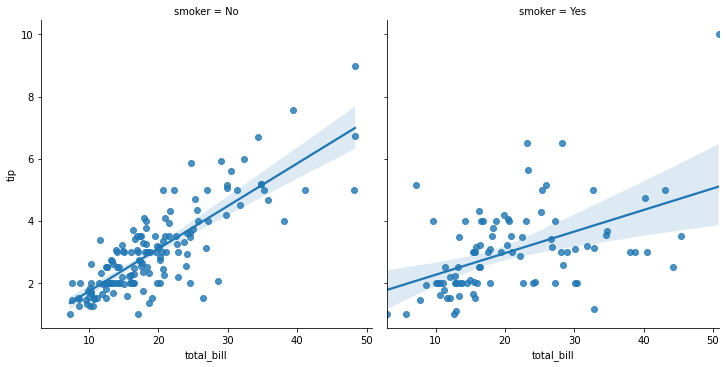

In [16]:

sns.lmplot(x="total_bill", y="tip", data=df, col="smoker")

# lm plot is actually doing a simple linear regression unde rhte hood
# non smoker have a much better line than non. smokers
    # smoekkrs confidence is crazy big because the data is everywhere

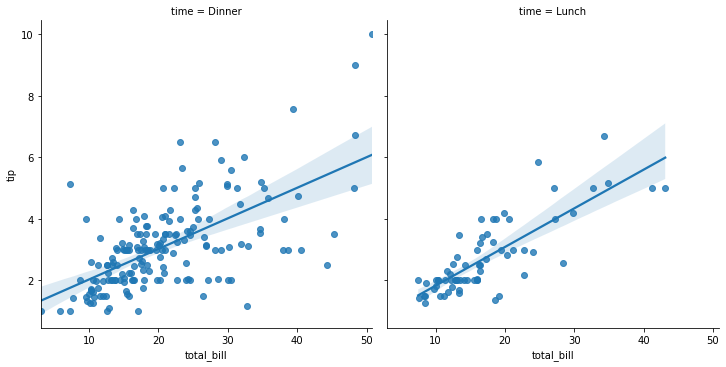

In [17]:

sns.lmplot(x="total_bill", y="tip", data=df, col="time")

# we can focus on dinner or lunch
    # lunch seems more steep than dinner visually
# we cant get the slope from. seaborn because they jsut want to give visuals
    # in order to ge tthe slope we woeuld have to build our own model using skleanr
        # this will be done later on


## Predicting Continuous Outcomes
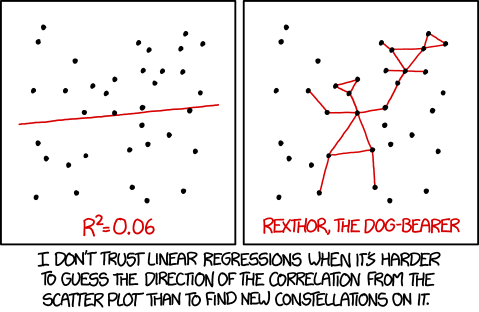
https://xkcd.com/1725/

In this module, we will analyze, visualize and model various labeled datasets that are being stored in SQL and have *continuous target variables*. This means we will do supervised machine learning (because the data is labeled) using regression (because the target variable we are analyzing is continuous) on structured data (because the data can be naturally stored in rows and columns).

- Labeled → Supervised Learning
- SQL → Structured Data
- continuous target → Regression

## Goals
1. **Acquisition-Gather**: Gather structured data from SQL to Pandas

2. **Acquisition-Summarize**: Summarize the data through aggregates, descriptive stats and distribution plots (histograms, density plots, boxplots, e.g.). (pandas: value_counts, head, shape, describe, info, matplotlib.pyplot.hist, seaborn.boxplot)

3. **Preparation-Clean**: We will convert datatypes and handle missing values. In this module we will keep it simple in how we handle missing values. We will introduce other ways to handle missing values as we progress through the course. (pandas: isnull, value_counts, dropna, replace)

4. **Preparation-Split**: We will sample the data so that we are only using part of our available data to analyze and model. We will discuss the reasons for doing this. This is known as "Train, Validate, Test Splitting". (sklearn.model_selection.train_test_split).

5. **Preparation-Scale**: We will discuss the importance of "scaling" data, i.e. putting variables of different units onto the same scale. We will scale data of different units to be on the same scale so they can be compared and modeled. We will discuss different methods for scaling data and why to use one type over another. (sklearn.preprocessing: StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler)

6. **Exploration-Hyptothesize**: We will discuss the meaning of "drivers", variables vs. features, and the target variable. We will disucss the importance of documenting your questions and hypotheses, how to answer them, and documenting takeaways and answers at each step of exploration.

7. **Exploration-Visualize**: We will use visualization techniques (scatterplots, jointplot, pairgrid, heatmap) to identify drivers. When a visualization needs to be followed up with a test, we will do so.

8. **Exploration-Test**: We will analyze the drivers of a continuous variable using appropriate statistical tests (t-tests and correlation tests).

9. **Modeling-Feature Engineering**: We will learn ways to identify, select and create features through feature engineering methods, specifically feature importance. We will discuss the "Curse of Dimensionality." (sklearn.feature_selection.f_regression).

10. **Modeling-Establish Baseline**: We will learn about the importance of a "baseline model" and ways to establish that.

11. **Modeling-Build Models**: We will build linear regression models, i.e. we will use well established algorithms, such as glm (generalized linear model) or a basic linear regression algorithm (e.g. y = mx + b), to extract the patterns the data is demonstrating and return to us a mathematical model or function (e.g. y = 3x + 2) that will predict the target variable, or outcome) we want to predict. We will learn about the differences in the most common regression algorithms. (sklearn.linear_model)

12. **Modeling-Model Evaluation**: We will compare regression models by computing "evaluation metrics", i.e. metrics that measure how well a model did at predicting the target variable. (statsmodels.formula.api.ols, sklearn.metrics, math.sqrt)

13. **Modeling-Model Selection and Testing**: We will learn how to select a model and we will test the model on the unseen data sample (the out-of-sample data in the validate and then test datasets).

14. **Data Science Pipeline and Product Delivery**: We will end with an end to end project practicing steps of the pipeline from planning through model selection and presentation.

# About Regression
**Regression** is a **supervised machine learning** technique used to model the relationship of one or more features, or independent variables, (one = simple regression, more = multiple regression) to one or more target, or dependent variables, (one = univariate regression, more = multivariate regression). The variables are represented by **continuous** data.

A regression algorithm attempts to find the function that best 'mimics' or 'models' this relationship, so that when new observations are available, predictions of the target variable can be made by running new values of the independent variables through the function for each observation. The algorithm does this by finding the line (for simple regression) or plane (for multiple regression) that minimizes the errors in our predictions when compared to the labeled data.

The algorithm attempts to find the “best” choices of values for the parameters, which in a linear regression model are the coefficients, 
b
i
, in order to make the formula as “accurate” as possible, i.e. minimize the error. There are different ways to define the error. But whichever evaluation metric is selected, we find the line of best fit by identifying the parameters that minimize that error.

Once estimated, the parameters (intercept and coefficients) allow the value of the target variable to be obtained from the values of the feature variables.

## Simple Linear Regression

*y=b0+b1x+ϵ*

In the simple linear case, our feature is x and our target is y. The algorithm finds the parameters that minimize the error between the actual values and the estimated values. The parameters the algorithm will estimate are the slope, β, and the y-intercept, α. ϵ is the error term, or the residual value. The residual is the difference of the actual value from the predicted value.

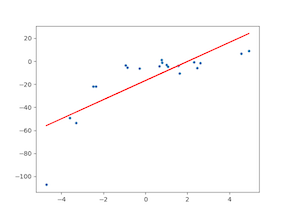

image source: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491



## Multiple LInear Regression

*y=b0+b1x1+b2x2+...bnxn+ϵ*

In a multiple linear regression case with n features, our features are x1 through xn and our target is y. The algorithm finds the parameters that minimize the error between the actual values and the estimated values. The parameters the algorithm will estimate are the coefficients of the features, b1 through bn, and the y-intercept, b0. ϵ is the error term, or the residual value.

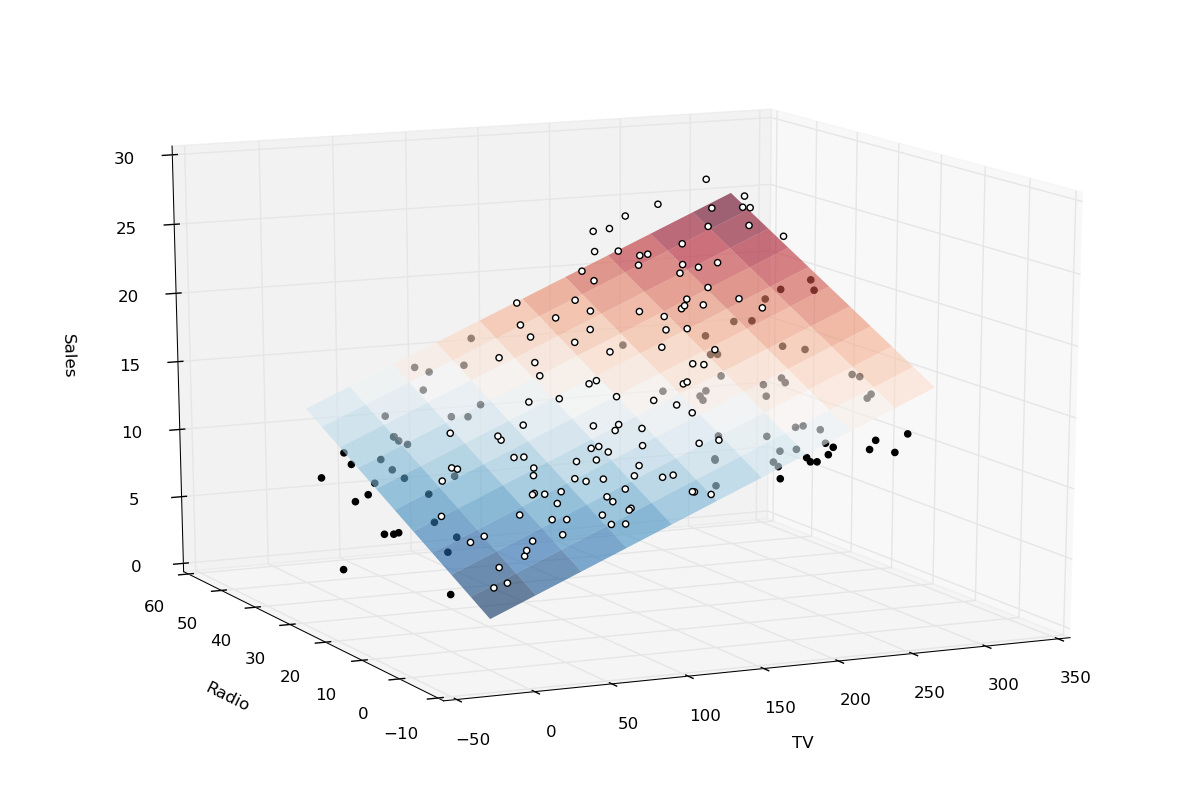

image source: http://nbviewer.ipython.org/urls/s3.amazonaws.com/datarobotblog/notebooks/multiple_regression_in_python.ipynb

Polynomial Regression
*y=b0+b1x+b2x2+...+bnxn+ϵ*

In the case we have a polynomial function (), we still have a linear model due to the fact that xi is in fact a feature, and the coefficients/weights associated with that feature is still linear. To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn. Then, we train the model using Linear Regression.

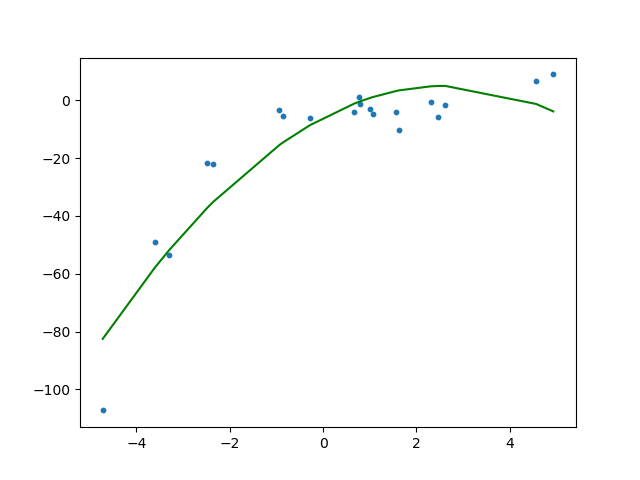

image source: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

## Notes

Throughout the regression curriculum you will see a module named `viz` imported in the code examples. This module contains some complex matplotlib plotting code. The intent of putting the code in a seperate module is to not distract from the lesson at hand.

https://ds.codeup.com/regression/viz.py